## Tema 2: El problema y la solución

En este notebook podremos en práctica los conceptos relacionados con el tema 2. Asegúrate de tener la lección a la mano si requieres de alguna información adicional.

## Carga de bibliotecas

Primero, vamos a comenzar cargando los paquetes que vamos a utilizar a lo largo del curso, estos son:

* [Numpy](https://numpy.org/) es una biblioteca con herramientas matemáticas poderosas en la manipulación de vectores, matrices y diversas funciones.
* [Pandas](https://pandas.pydata.org/) es una biblioteca especializada en el análisis de datos.
* [Matplotlib](https://matplotlib.org/) es una biblioteca completamente enfocada a la visualización.
* [Seaborn](https://seaborn.pydata.org/) es una biblioteca basada en Matplotlib especializada en datos y estadística informativa.

> Para la fecha de creación de este notebook, 9 de junio de 2022, se utilizó Python v3.8.13, Numpy v1.22.3, Pandas v1.4.1, Matplotlib v3.5.1 y Seaborn v0.11.2

In [1]:
# Cargamos las bibliotecas que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Luego ajustamos algunos parámetros para la visualización
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 1.5})
%matplotlib inline

# Definimos la semilla para generar los números aleatorios
np.random.seed(431)

## Ejemplo del operador esperanza

En esta sección puedes encontrar una breve explicación de cómo harías los cálculos mostrados en el curso para determinar el valor esperado en el ejemplo de las calificaciones.

En la primera parte creamos los datos iniciales, es decir, materias, créditos y notas. Luego, agregamos las otras dos columnas de pesos y productos utilizando la información ya almacenada. Por último, hacemos el cálculo del valor esperado.

In [2]:
# Primero creamos el DataFrame equivalente a la tabla de datos del ejemplo
tabla_calificaciones = pd.DataFrame({
    "Materia": ['Artes', 'Matemáticas', 'Biología', 'Economía'],
    "Crédito": [3, 5, 4, 4],
    "Nota": [9.5, 10.0, 8.5, 9.0]
})

# Mostramos la tabla
tabla_calificaciones

,Materia,Crédito,Nota
0,Artes,3,9.5
1,Matemáticas,5,10.0
2,Biología,4,8.5
3,Economía,4,9.0


In [3]:
# Creamos la columna con los pesos
tabla_calificaciones['Peso'] = tabla_calificaciones['Crédito'] / tabla_calificaciones['Crédito'].sum()

# Creamos la columna con los productos entre las notas y los pesos
tabla_calificaciones['x * p'] = tabla_calificaciones['Nota'] * tabla_calificaciones['Peso']

# Mostramos la tabla
tabla_calificaciones

,Materia,Crédito,Nota,Peso,x * p
0,Artes,3,9.5,0.1875,1.78125
1,Matemáticas,5,10.0,0.3125,3.12500
2,Biología,4,8.5,0.2500,2.12500
3,Economía,4,9.0,0.2500,2.25000


In [4]:
# Finalmente, calculamos la suma de la última columna
print("Valor esperado =", tabla_calificaciones['x * p'].sum())

Valor esperado = 9.28125


Otra forma de hacer este cálculo es utilizando el método average de Numpy. Si te das cuenta, no es un promedio convencional; en este consideramos los pesos.

In [5]:
# Realizamos el mismo procedimiento con Numpy.
print("Valor esperado =",
      np.average(tabla_calificaciones['Nota'],
                 weights=tabla_calificaciones['Peso'])
      )

Valor esperado = 9.28125


## Problema del bandido multibrazos

En esta sección simulamos los datos correspondientes al problema de un caso específico del bandido multibrazos. Recuerda revisar el material del curso para la explicación detallada.


In [6]:
# Generamos el número de muestras y el número de acciones
num_muestras = 1000
num_acciones = 10

# Valores deseados de las acciones, es decir, q
valor_accion_deseado = np.random.rand(num_acciones)

In [7]:
# Usamos los valores de las acciones como medias
datos_medias = np.abs(valor_accion_deseado)
datos_anchos = np.random.uniform(0.0, 1.0, num_acciones)

# Simulamos las muestras para las distribuciones de cada acción
datos_acciones = {}
for i in range(num_acciones):
    datos_acciones[f'{i + 1}'] = np.random.normal(
        datos_medias[i], datos_anchos[i], num_muestras)

# Convertimos este diccionario en una dataframe
df = pd.DataFrame(datos_acciones)

# Vemos el inicio de esta tabla
df.head()

,1,2,3,4,5,6,7,8,9,10
0,0.478080,-0.067588,0.143726,1.550394,-0.206041,1.386924,0.405035,0.296386,0.640197,0.425348
1,0.406245,0.300752,1.146218,-0.026092,0.136826,2.474813,-0.206457,0.913342,-0.060347,0.259275
2,0.936663,1.009378,0.977293,0.754034,-1.106753,-0.497809,-0.265562,0.513588,0.494648,0.970555
3,1.566315,1.315184,-0.077763,0.655125,-0.097988,-0.198580,0.248625,0.608118,0.087014,-0.032643
4,0.588852,1.418682,1.021407,0.521352,0.388110,1.341876,-0.304245,-0.039954,0.096782,0.494860


In [8]:
# Analizamos el conjunto de información y sus estadísticas
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.926122,0.512736,0.959523,1.015564,0.122881,0.778278,0.044114,0.644954,0.302238,0.472644
std,0.471080,0.775608,0.407819,0.750233,0.667644,0.939809,0.465747,0.345497,0.244680,0.335443
min,-0.572090,-2.219606,-0.605015,-1.158067,-1.727766,-2.520690,-1.377158,-0.273026,-0.721908,-0.582567
25%,0.612211,0.005648,0.680876,0.501764,-0.321718,0.176186,-0.267242,0.402410,0.140373,0.254501
50%,0.938171,0.536980,0.965412,1.018502,0.106867,0.833984,0.031378,0.628526,0.299626,0.466805
75%,1.243502,1.063750,1.237395,1.535150,0.575518,1.385208,0.362873,0.891695,0.457532,0.698689
max,2.261639,3.040876,2.169591,3.464227,2.653639,4.032442,1.444904,1.785707,1.200766,1.720843


In [9]:
print("Valores de la media:", datos_medias)
print("Valores de la desviación estándar:", datos_anchos)

Valores de la media: [0.92456966 0.47968852 0.98133049 0.99858242 0.13383975 0.74913441
 0.04001772 0.63576894 0.30232793 0.47274177]
Valores de la desviación estándar: [0.46838891 0.75005025 0.41874148 0.73182816 0.67539482 0.96892552
 0.45507356 0.33710752 0.2370925  0.33338446]


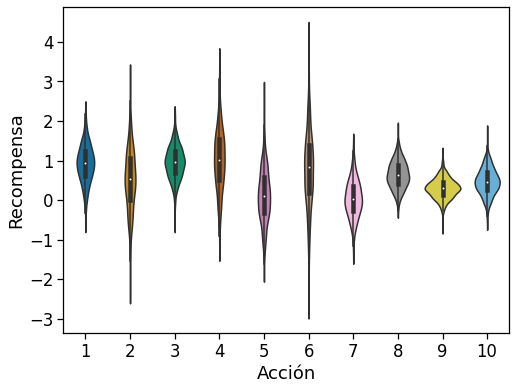

In [10]:
# Graficamos los datos de las simulaciones
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, palette='colorblind')
plt.ylabel(r"Recompensa")
plt.xlabel(r"Acción")
plt.show()

Otra gráfica que tal vez te pueda interesar, que está muy relacionada con la anterior y es bastante más común, es el boxplot. Su lectura es similar a la de los violines. Para mayores referencias, te invito a consultar: [Boxplot](https://en.wikipedia.org/wiki/Box_plot) y [Violinplot](https://chartio.com/learn/charts/violin-plot-complete-guide/).

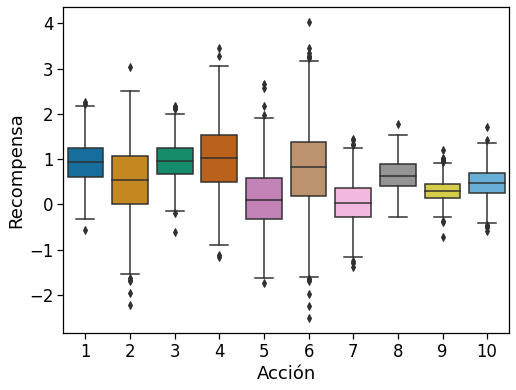

In [11]:
# Graficamos los datos de las simulaciones
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette='colorblind')
plt.ylabel(r"Recompensa")
plt.xlabel(r"Acción")
plt.show()

## Simulación del algoritmo $\varepsilon$-greedy

En esta sección realizamos la implementación del algoritmo $\varepsilon$-greedy como una de las estrategias más sencillas para resolver el problema del bandido multibrazos. Recuerda consultar el curso para tener los detalles de cada bloque de código.

In [12]:
def alg_epsilon_greedy(valores_estimados, epsilon=0.5):
    """
    Esta función realiza la selección de una acción de acuerdo con el valor de la probabilidad `epsilon`.

    :param valores_estimados: Lista de los valores estimados para cada una de las k acciones. Recuerde que `k = len(valores_estiamdos)`
    :type valores_estimados: list or array

    :param epsilon: Probabilidad de seleccionar una acción utilizando la estrategia greedy. Su valor por defecto es de 0.5.
    :type epsilon: float

    :return: Un entero de 0 a k-1 correspondiente a la acción seleccionada
    :rtype: int
    """
    if np.random.uniform(0, 1) <= epsilon:
        # Estrategia de exploración
        return np.random.choice(np.arange(len(valores_estimados)))
    else:
        # Estrategia de explotación (Greedy)
        return np.argmax(valores_estimados)

In [13]:
def fun_recompensa(accion, valores_deseados):
    """
    Esta es la función de recompensa que se encarga de entregar un +1 si el valor de la acción corresponde al deseado o un -1 si éste no lo hace.

    :param accion: Es el índice correspondiente a la acción.
    :type accion: int

    :param valores_deseados: Es una lista con los valores esperados para cada una de las acciones. Es decir, los valores teóricos.
    :type valores_deseados: lista or array

    :return: La recompensa para dicha acción
    :rtype: int
    """
    if np.random.rand() <= valores_deseados[accion]:
        return 1
    else:
        return -1

In [14]:
def bandido_simple(valores_deseados, brazos=10, pasos=1000, epsilon=0.5):
    """
    Este código corresponde a la simulación de un bandido de múltiples brazos.

    :param valores_deseados: Lista de los valores esperados para las acciones.
    :type valores_deseados:

    :param brazos: Número de brazos o palancas. Valor por defecto: 10.
    :type brazos: int

    :param pasos: Número de pasos o turnos en la simulación. Valor por defecto: 1000.
    :type pasos: int

    :param epsilon: Probabilidad de utilizar la estrategia greedy. Valor por defecto: 0.5.
    :type epsilon: float

    :return: Lista de la evolución del valor de recompensas R y de la comparación lógica de la acción óptima.
    :rtype: list, list
    """
    # Se inicializan los registros para recompensas y valores óptimos
    historico_R = []
    optimo_A = []

    # Inicializamos los valores para Q y N con tantos ceros como número de brazos
    Q = [0] * brazos
    N = [0] * brazos

    # Ciclo principal de la simulación para cada paso a realizar
    for i in range(pasos):
        # Elegimos la acción de acuerdo con el algoritmo epsilon-greedy
        A = alg_epsilon_greedy(valores_estimados=Q, epsilon=epsilon)

        # Evaluamos la acción y determinamos su recompensa
        R = fun_recompensa(A, valores_deseados)

        # Actualizamos el número de veces que dicha acción ha sido elegida
        N[A] += 1

        # Utilizamos la expresión para estimar el valor de cada acción
        Q[A] = Q[A] + (R - Q[A]) / N[A]

        # Almacenamos el nuevo valor de R
        historico_R.append(R)

        # Comprobamos si la acción es óptima y guardamos su resultado
        optimo_A.append(A == np.argmax(valores_deseados))

    #  Devolvemos las dos listas de R y valores óptimos de A
    return historico_R, optimo_A

In [15]:
# Definimos los parámetros iniciales de la simulación
num_pasos = 1000
eps = 0.1

# Establecemos los valores deseados para las acciones
np.random.seed(123)
valor_accion_deseado = np.random.uniform(0, 1, num_acciones)

# Implementamos la simulación
recompensas, acciones_optimas = bandido_simple(valores_deseados=valor_accion_deseado, brazos=10, pasos=num_pasos, epsilon=eps)

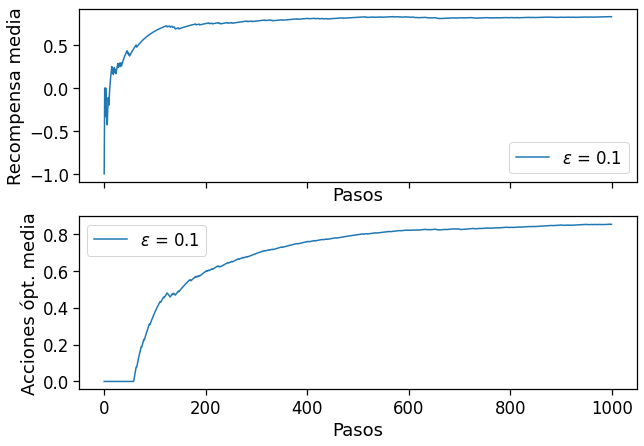

In [16]:
# Define el tamaño y el númeor de subplots
fi, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)

# Graficamos la suma acumulada de las recompensas
ax1.plot(np.cumsum(recompensas) / (np.arange(num_pasos) + 1),
         label=r"$\epsilon$ = {}".format(eps))
ax1.set_ylabel(r"Recompensa media")
ax1.set_xlabel(r"Pasos")
ax1.legend()

# Graficamos la suma acumulada de las acciones óptimas
ax2.plot(np.cumsum(acciones_optimas) / (np.arange(num_pasos) + 1), label=r"$\epsilon$ = {}".format(eps))
ax2.set_ylabel(r"Acciones ópt. media")
ax2.set_xlabel(r"Pasos")
ax2.legend()

# Mostramos todo lo anterior
plt.show()

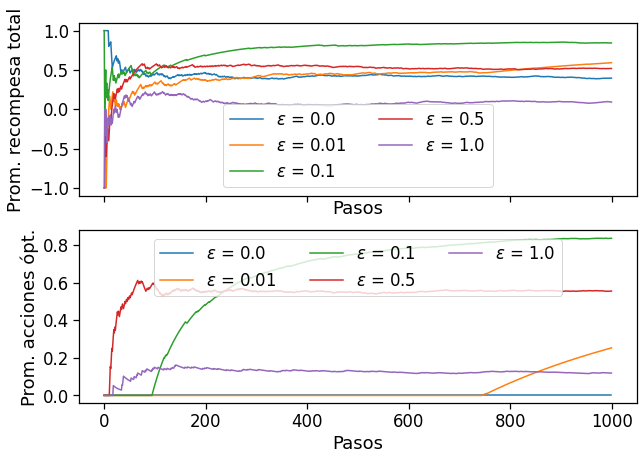

In [17]:
# Define el tamaño y el númeor de subplots
fi, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)
plt.ion()

# Ciclo principar para diferentes valores de epsilon
for eps in [0.0, 0.01, 0.1, 0.5, 1.0]:
    # Implementamos la simulación para un valor eps dado
    recompensas, acciones_optimas = bandido_simple(
        valor_accion_deseado, brazos=10, pasos=1000, epsilon=eps)

    # Graficamos la suma acumulada de las recompensas
    ax1.plot(np.cumsum(recompensas) / (np.arange(num_pasos) + 1),
             label=r"$\epsilon$ = {}".format(eps))

    # Graficamos la suma acumulada de las acciones óptimas
    ax2.plot(np.cumsum(acciones_optimas) / (np.arange(num_pasos) + 1),
             label=r"$\epsilon$ = {}".format(eps))

# Ajustamos las etiquetas y leyendas de la primera gráfica
ax1.set_ylabel(r"Prom. recompesa total")
ax1.set_xlabel(r"Pasos")
ax1.legend(loc='lower center', ncol=2)

# Ajustamos las etiquetas y leyendas de la segunda gráfica
ax2.set_ylabel(r"Prom. acciones ópt.")
ax2.set_xlabel(r"Pasos")
ax2.legend(loc='upper center', ncol=3)
plt.show()

In [18]:
def correr_simulaciones(valores_deseados, repeticiones=2000, pasos=1000, brazos=10, epsilon=0.5):
    """
    Función encargada de correr varias simulaciones para una configuración dada.

    :param valores_deseados: Lista de los valores esperados para las acciones.
    :type valores_deseados:

    :param repeticiones: Número de repeticiones a realizar. Valor por defecto: 2000.
    :type repeticiones: int

    :param pasos: Número de pasos o turnos en la simulación. Valor por defecto: 1000.
    :type pasos: int

    :param brazos: Número de brazos o palancas. Valor por defecto: 10.
    :type brazos: int

    :param epsilon: Probabilidad de utilizar la estrategia greedy. Valor por defecto: 0.5.
    :type epsilon: float

    :return: Lista de la evolución promedio del valor de recompensas R y de la comparación lógica de la acción óptima.
    :rtype: array, array
    """
    # Inicializa las matrices de tamaño repeticiones x pasos en ceros
    recompensas = np.zeros((repeticiones, pasos))
    acciones_optimas = np.zeros((repeticiones, pasos))

    # Comienza el ciclo principar de repeticiones de la simulación
    for rep in range(repeticiones):
        # Ejecuta la simulación del bandido multibrazos
        recompensas[rep][:], acciones_optimas[rep][:] = bandido_simple(
            valores_deseados, brazos, pasos, epsilon)

    # Calcula el promedio, por repetición, de los resultados
    promedio_recompensas = np.average(recompensas, axis = 0)
    promedio_acciones_optimas = np.average(acciones_optimas, axis = 0)

    # Devuelve los arrays con los promedios de las recompensas y acciones ópt.
    return promedio_recompensas, promedio_acciones_optimas

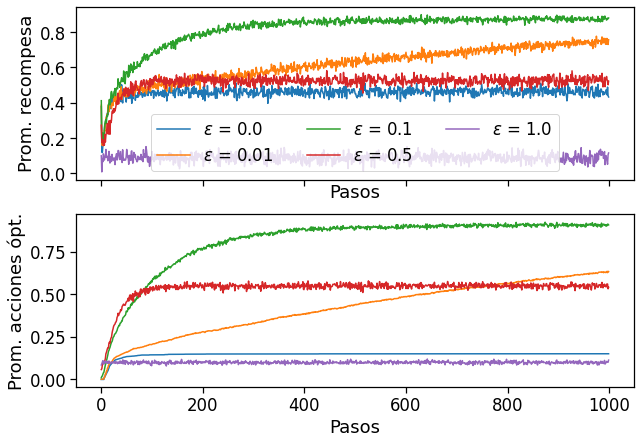

In [19]:
# Define el tamaño y el númeor de subplots
fi, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)
plt.ion()

# Ciclo principar para diferentes valores de epsilon
for eps in [0.0, 0.01, 0.1, 0.5, 1.0]:
    # Implementamos el conjunto de simulaciones para un valor eps dado
    promedio_recompensas, promedio_acciones_optimas = correr_simulaciones(
        valores_deseados=valor_accion_deseado,
        repeticiones=2000, pasos=1000, brazos=10, epsilon=eps)

    # Graficamos el promedio por paso de las recompensas
    ax1.plot(promedio_recompensas,
             label=r"$\epsilon$ = {}".format(eps))
    # Graficamos el promedio por paso de las acciones óptimas
    ax2.plot(promedio_acciones_optimas, label=r"$\epsilon$ = {}".format(eps))

# Ajustamos las etiquetas y leyendas de la primera gráfica
ax1.set_ylabel(r"Prom. recompesa")
ax1.set_xlabel(r"Pasos")
ax1.legend(loc='lower center', ncol=3)

# Ajustamos las etiquetas y leyendas de la segunda gráfica
ax2.set_ylabel(r"Prom. acciones ópt.")
ax2.set_xlabel(r"Pasos")
# ax2.legend(loc='upper center', ncol=3)
plt.show()